In [2]:
# %matplotlib inline
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from matplotlib.collections import PolyCollection

In [3]:
from scipy.spatial.transform import Rotation

In [4]:
plt.style.use('default_colors.mplstyle')

In [ ]:
# укажем директорию, в которую будем 
# сохранять сгенерированные картинки
FOLDER = 'bunny'
try:
    os.mkdir(FOLDER)
except FileExistsError:
    pass

In [5]:
# Вершины и грани (faces) в виде треугольников
V = []
F = []

with open(file='bunny.obj', mode='r', encoding='utf-8') as f:
    for line in f.readlines():
        if line.startswith('#'):
            continue
        values = line.split()
        if not values:
            continue
        # вершины
        if values[0] == 'v':
            V.append(np.asarray(values[1:4], dtype=float))
        elif values[0] == 'f':
            F.append(np.asarray(values[1:4], dtype=int))

V = np.array(V)
# Для использования F в качестве индексов для массива V надо из 
# всех элементов F вычесть 1
F = np.array(F)-1

center = np.sum(V, axis=0) / V.size

V = (V - 0.5*(V.max(axis=0) + V.min(axis=0))) / max(V.max(axis=0) - V.min(axis=0))

In [6]:
# Первая грань кролика
V[F[0]]

array([[-0.44960996,  0.20842409,  0.06390175],
       [-0.46982435,  0.19051146,  0.09833141],
       [-0.46848785,  0.21766576,  0.09004141]])

In [7]:
# Вращаем на малый угол θ вокруг оси вращения u

θ = np.pi/100
u = np.array([0, 1, 0])
# функция принимает вектор u, а его длину использует
# в качестве значения угла вращения
R = Rotation.from_rotvec(θ * u)

In [8]:
# вращаем вершины
V = R.apply(V)
# Формируем грани (полигоны/многоугольники)
Polygons = V[F]

<IPython.core.display.Javascript object>


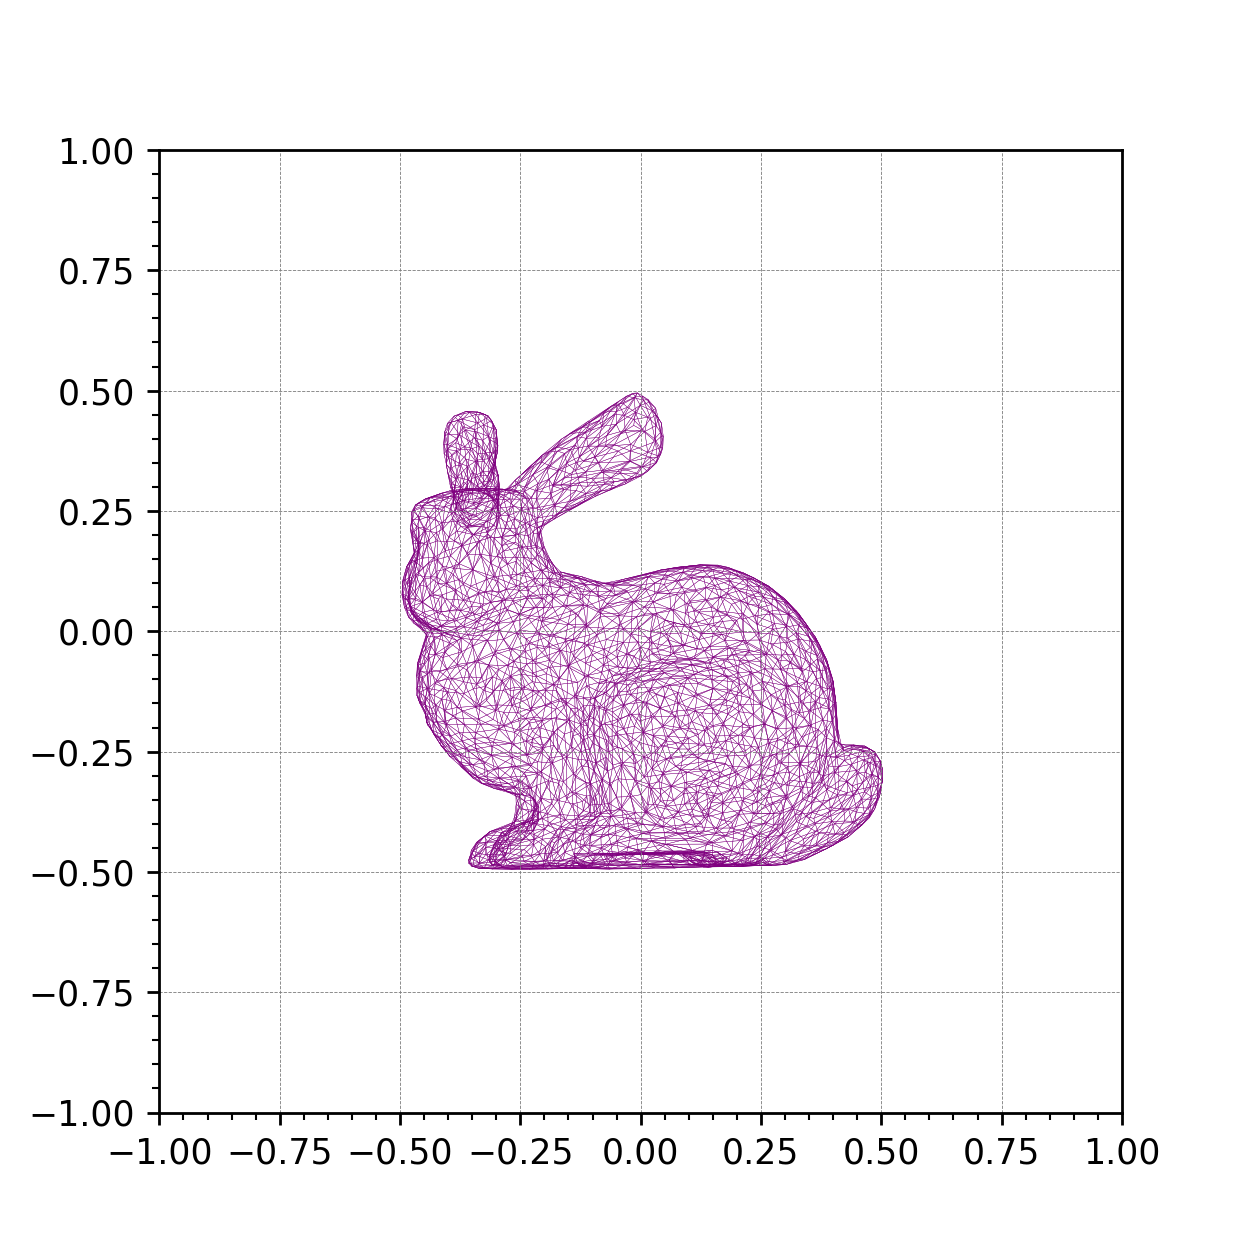

In [9]:
fig01 = plt.figure(num=1, figsize=(5, 5), dpi=200)
ax01 = fig01.add_subplot(1, 1, 1)

ax01.set(
    xlim=(-1.0, 1.0),
    ylim=(-1.0, 1.0),
    aspect='equal'
)

# Если рисовать на плоскости x, y, то нужны только первые две координаты
collection = PolyCollection(Polygons[:, :, :2], closed=True,
                            linewidth=0.1, facecolor='None', edgecolor='purple')
ax01.add_collection(collection)

<IPython.core.display.Javascript object>


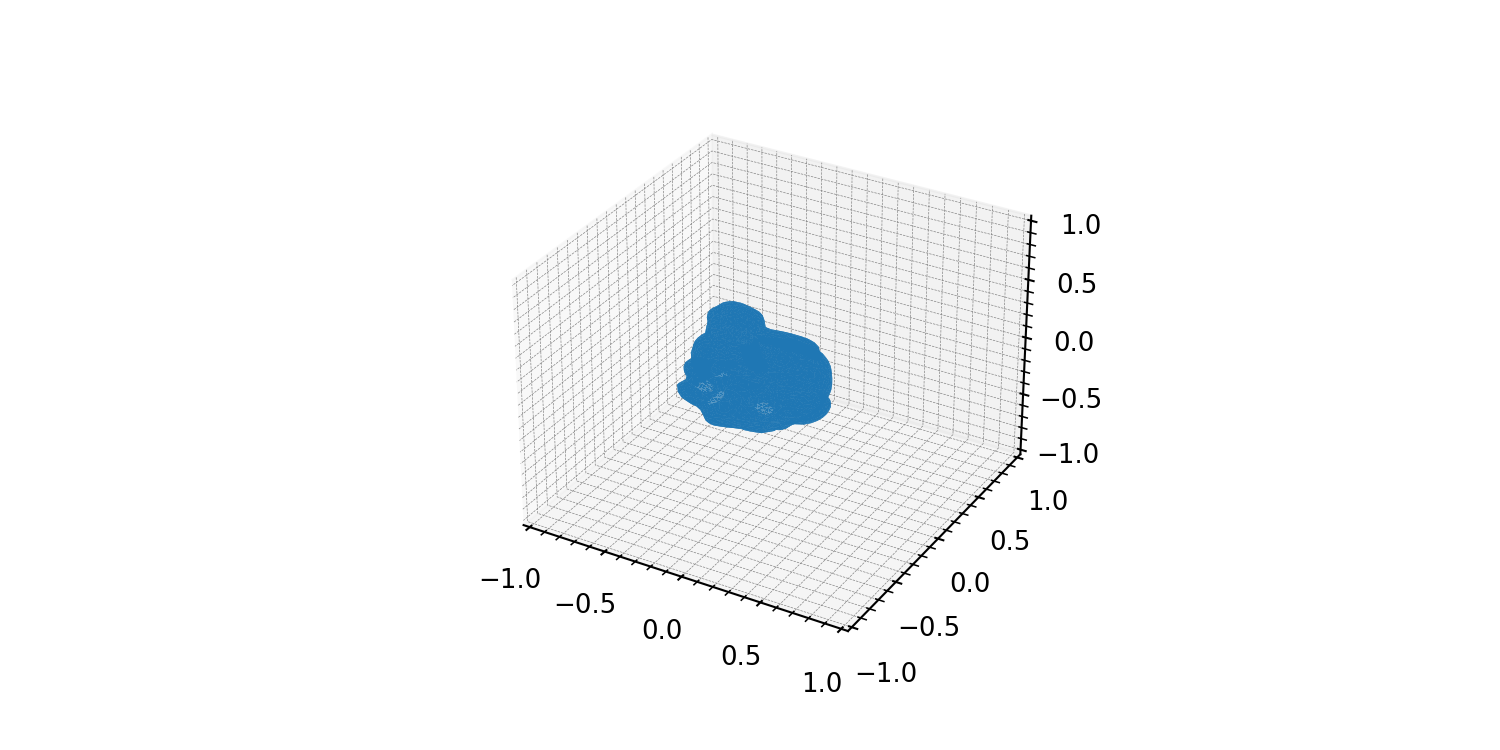

In [10]:
fig3d = plt.figure(num=2, dpi=150)
ax3d = fig3d.add_subplot(1,1,1, projection='3d')

ax3d.set(
    xlim=(-1.0, 1.0),
    ylim=(-1.0, 1.0),
    zlim=(-1.0, 1.0),
    aspect='auto'
)

collection3d = Poly3DCollection(Polygons, linewidth=0.1)
ax3d.add_collection3d(collection3d)
fig3d.show()

In [ ]:
z